# EMPLOYEE ATTRITION CONTROL

### CASE STUDY
The project is to help a company which is trying to control attrition. There are two sets of data: "Existing employees" and "Employees who have left". Following attributes are available for every employee;
-Satisfaction Level
-Last evaluation
-Number of projects
-Average monthly hours
-Time spent at the company
-Whether they have had a work accident
-Whether they have had a promotion in the last 5 years
-Departments (column sales)
-Salary

Use your analytics skills to answer the following questions :
1. What type of employees are leaving?
2. Which employees are prone to leave next.
3. Recommendations

In [2]:
import pandas as pd
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs

C:\Users\Public\DSNanaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.ExcelFile('TakenMind-Python-Analytics-Problem-case-study-1-1.xlsx') 

In [4]:
sheet1_df   = pd.read_excel(data,'INFO') 
sheet1_df

,"The data is for company X which is trying to control attrition. There are two sets of data: ""Existing employees"" and ""Employees who have left"". Following attributes are available for every employee."
0,Satisfaction Level
1,Last evaluation
2,Number of projects
3,Average monthly hours
4,Time spent at the company
5,Whether they have had a work accident
6,Whether they have had a promotion in the last ...
7,Departments (column sales)
8,Salary
9,Whether the employee has left


In [5]:
sheet2_df   = pd.read_excel(data, 'Existing employees') 
sheet2_df

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11423,14207,0.90,0.55,3,259,10,1,1,management,high
11424,14208,0.74,0.95,5,266,10,0,1,management,high
11425,14209,0.85,0.54,3,185,10,0,1,management,high
11426,14210,0.33,0.65,3,172,10,0,1,marketing,high


In [6]:
sheet3_df   = pd.read_excel(data, 'Employees who have left') 
sheet3_df

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
3566,14995,0.40,0.57,2,151,3,0,0,support,low
3567,14996,0.37,0.48,2,160,3,0,0,support,low
3568,14997,0.37,0.53,2,143,3,0,0,support,low
3569,14998,0.11,0.96,6,280,4,0,0,support,low


# Existing employees

In [7]:
sheet2_df.shape

(11428, 10)

In [8]:
sheet2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11428 entries, 0 to 11427
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 11428 non-null  int64  
 1   satisfaction_level     11428 non-null  float64
 2   last_evaluation        11428 non-null  float64
 3   number_project         11428 non-null  int64  
 4   average_montly_hours   11428 non-null  int64  
 5   time_spend_company     11428 non-null  int64  
 6   Work_accident          11428 non-null  int64  
 7   promotion_last_5years  11428 non-null  int64  
 8   dept                   11428 non-null  object 
 9   salary                 11428 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 892.9+ KB


This dataset has 11,428 samples, and 10 attributes(6 integer, 2 float, and 2 objects).
No variable column has null/missing values.

# 1. Visualization  using Seaborn for Existing Employees

The dataset features can be analyzed one by one, but it will be time-consuming. The better option is here to use Seaborn library and plot all the graphs in a single run using subplots.

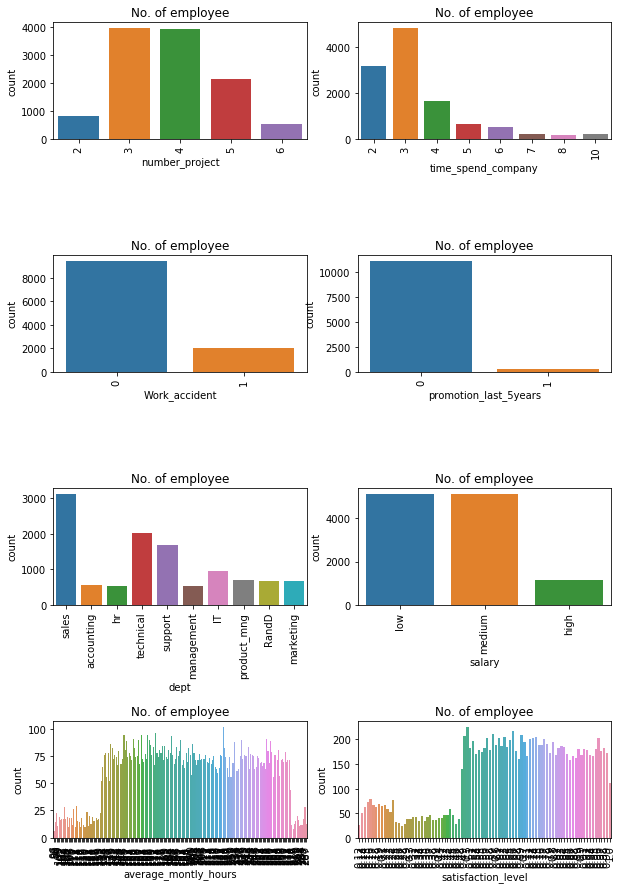

In [9]:
features=['number_project','time_spend_company','Work_accident', 'promotion_last_5years','dept','salary',
          'average_montly_hours','satisfaction_level']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data =sheet2_df)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

<h3>satisfaction level of the Existing employees</h3>

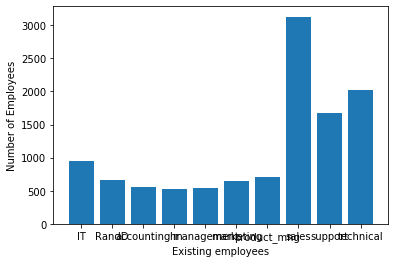

In [10]:
left_count=sheet2_df.groupby('dept').count()
plt.bar(left_count.index.values, left_count['satisfaction_level'])
plt.xlabel('Existing employees')
plt.ylabel('Number of Employees')
#plt.subplots(figsize=(20,15))
plt.show()

In [11]:
sheet2_df.satisfaction_level.value_counts()

0.50    226
0.66    217
0.59    212
0.69    209
0.49    207
       ... 
0.26     29
0.28     28
0.46     27
0.12     26
0.27     24
Name: satisfaction_level, Length: 89, dtype: int64

Here, you can see the value count of satisfaction level of the Existing employees

<h3>Time Spent in Company by Existing Employees</h3>


Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?

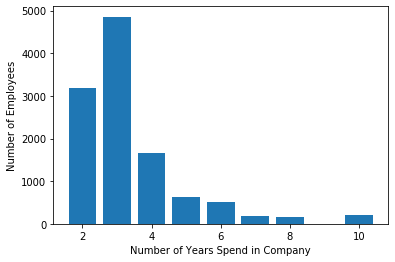

In [12]:
time_spent=sheet2_df.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()

<h3>Number of Projects by Existing Employees</h3>

Similarly, you can also plot a bar graph to count the number of employees deployed on How many projects?

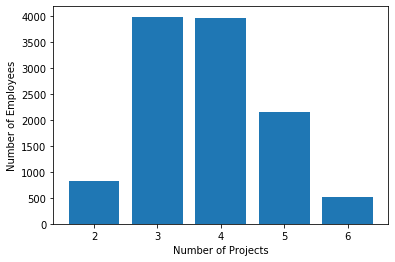

In [13]:
num_projects=sheet2_df.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

Most of the existing employee are doing 3-4 projects.

<h3>Time Spent in Company by  Existing Employees</h3>

Similarly, you can also plot a bar graph to know the number experience years of existng employees

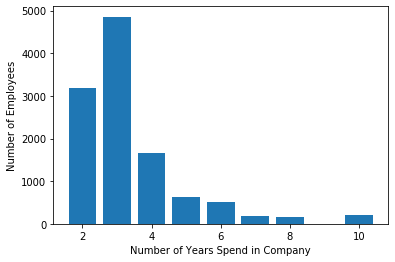

In [14]:
time_spent=sheet2_df.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()

Most of the existing employees have experience between 2-4 years. 

# Employees who have left

In [15]:
sheet3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 3571 non-null   int64  
 1   satisfaction_level     3571 non-null   float64
 2   last_evaluation        3571 non-null   float64
 3   number_project         3571 non-null   int64  
 4   average_montly_hours   3571 non-null   int64  
 5   time_spend_company     3571 non-null   int64  
 6   Work_accident          3571 non-null   int64  
 7   promotion_last_5years  3571 non-null   int64  
 8   dept                   3571 non-null   object 
 9   salary                 3571 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 279.1+ KB


# 2. Visualization using Seaborn for Employees who have left

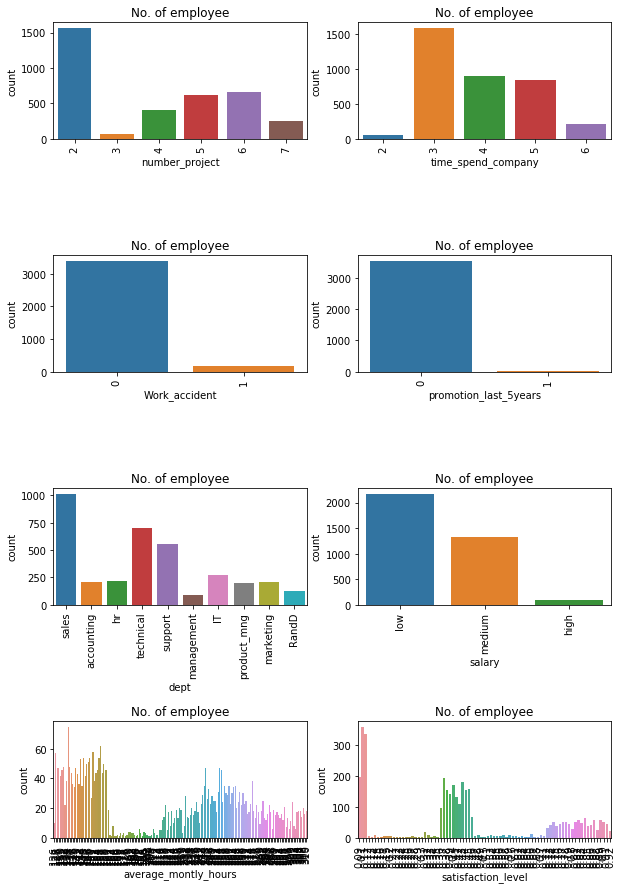

In [16]:
features=['number_project','time_spend_company','Work_accident', 'promotion_last_5years','dept','salary',
          'average_montly_hours','satisfaction_level']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data =sheet3_df)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

# 3 Creating Attrition column 

By combining the two datasets 

In [17]:
sheet2_df['attrition_status']='around'

In [18]:
sheet2_df

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition_status
0,2001,0.58,0.74,4,215,3,0,0,sales,low,around
1,2002,0.82,0.67,2,202,3,0,0,sales,low,around
2,2003,0.45,0.69,5,193,3,0,0,sales,low,around
3,2004,0.78,0.82,5,247,3,0,0,sales,low,around
4,2005,0.49,0.60,3,214,2,0,0,sales,low,around
...,...,...,...,...,...,...,...,...,...,...,...
11423,14207,0.90,0.55,3,259,10,1,1,management,high,around
11424,14208,0.74,0.95,5,266,10,0,1,management,high,around
11425,14209,0.85,0.54,3,185,10,0,1,management,high,around
11426,14210,0.33,0.65,3,172,10,0,1,marketing,high,around


In [19]:
sheet3_df['attrition_status']='left'

In [20]:
full_data=sheet2_df.append(sheet3_df)
full_data

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,attrition_status
0,2001,0.58,0.74,4,215,3,0,0,sales,low,around
1,2002,0.82,0.67,2,202,3,0,0,sales,low,around
2,2003,0.45,0.69,5,193,3,0,0,sales,low,around
3,2004,0.78,0.82,5,247,3,0,0,sales,low,around
4,2005,0.49,0.60,3,214,2,0,0,sales,low,around
...,...,...,...,...,...,...,...,...,...,...,...
3566,14995,0.40,0.57,2,151,3,0,0,support,low,left
3567,14996,0.37,0.48,2,160,3,0,0,support,low,left
3568,14997,0.37,0.53,2,143,3,0,0,support,low,left
3569,14998,0.11,0.96,6,280,4,0,0,support,low,left


In [21]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 3570
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  attrition_status       14999 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.4+ MB


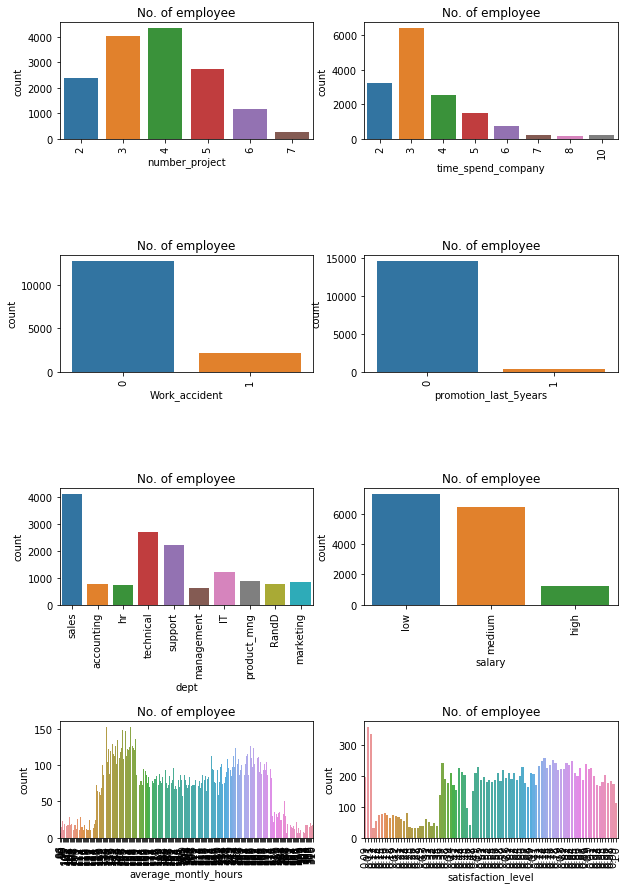

In [22]:
features=['number_project','time_spend_company','Work_accident', 'promotion_last_5years','dept','salary',
          'average_montly_hours','satisfaction_level']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data =full_data)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

# Observations 

# Data Analysis and Visualization Summary:

# Building a Prediction Model

In [23]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
full_data['salary']=le.fit_transform(full_data['salary'])
full_data['dept']=le.fit_transform(full_data['dept'])
full_data['attrition_status']=le.fit_transform(full_data['attrition_status'])

In [24]:
#Spliting data into Feature and
X=full_data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary']]
y=full_data['attrition_status']

In [25]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

# Model Building

In [26]:
# USING LOGISTIC REGRESSION ALGORITHM
from sklearn.linear_model import LogisticRegression
#Create Gradient Boosting Classifier
lr=LogisticRegression(random_state=0)

#Train the model using the training sets
lr.fit(X_train,y_train)

#Predict the response for test dataset

y_pred=lr.predict(X_test)

C:\Users\Public\DSNanaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [27]:
#accuracy_score
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.7706666666666667

# Evaluating Model Performance

In [32]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7804444444444445
Precision: 0.5501066098081023
Recall: 0.2492753623188406


In [30]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[3214,  251],
       [ 781,  254]], dtype=int64)

# Trying Different Algorithm 

<h3> Support Vector Machine Algorithm</h3>

In [31]:
from sklearn import svm
model=svm.SVC(kernel='linear')

model.fit(X_train,y_train)

y_pred = model.predict(X_test) #here you evaluate the model by using testing data set

score=accuracy_score(y_test, y_pred)
print('Accuracy Using Support Vector Machine Algorithm is:', score*100)


Accuracy Using Support Vector Machine Algorithm is: 78.04444444444445


<h3>DecisionTreeClassifier </h3>

In [34]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.25) 
clf_dt=DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train,y_train)
y_pred=clf_dt.predict(X_test) #here you evaluate the model by using testing data set
score=accuracy_score(y_test, y_pred)
print('Accuracy Using Decision Tree Classifier Algorithm is:', score)

Accuracy Using Decision Tree Classifier Algorithm is: 0.972


In [35]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2801,   69],
       [  36,  844]], dtype=int64)

# Conclusion